In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from fiber_properties import FiberImage
from matplotlib import rc, cycler
cmap = mpl.cm.get_cmap('inferno')
import os
import numpy as np

rc('figure', figsize=[3.39, 3.0])
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{siunitx}')

rc('font', size=10, family='serif', serif=['Computer Modern Roman'])
rc('axes', labelsize=10, linewidth=1, unicode_minus=True)
rc('legend', frameon=False, fontsize=10, labelspacing=0.5, numpoints=1)
rc('lines', linewidth=1)

rc('xtick', labelsize=10, direction='in', top=True)
rc('xtick.major', size=4, width=1)
rc('xtick.minor', visible=True, size=2, width=1)

rc('ytick', labelsize=10, direction='in', right=True)
rc('ytick.major', size=4, width=1)
rc('ytick.minor', visible=True, size=2, width=1)


In [2]:
# Best run once .pkl files have been created and have .get_fiber_center and .get_fiber_centroid saved #
folder = '../data/modal_noise/rv_error/'

cases = ['coupled_ag_new/', 'slow_agitation/', 'LED/']  # cases to plot on graph (3)
meth = 'full'  # method
cam = 'nf'  # nf or ff

# List of 3 lists - one for each case - [[nf, ff], [nf, ff]...]
angle = [[np.deg2rad(90-52.5), np.deg2rad(90+52.5)],
         [np.deg2rad(90-58), np.deg2rad(90+58)],
         [np.deg2rad(90-58.5), np.deg2rad(90+58.5)]]


### Case: coupled_ag_new/ ###
Found fiber centers
Getting nf diameter
plotting case: coupled_ag_new
### Case: slow_agitation/ ###
Found fiber centers
Getting nf diameter
plotting case: slow_agitation
### Case: LED/ ###
Found fiber centers
Getting nf diameter
plotting case: LED


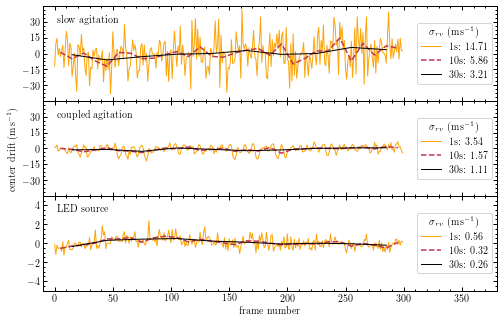

In [3]:
# Plot base figure #
fig1, (axis1, axis2, axis3) = plt.subplots(3, 1, sharex=True, figsize=[7.1,4.6])
# Labels #
# axis1.set_ylabel('Center drift (m/s)')
axis2.set_ylabel('center drift (\\SI{}{\meter\per\second})')
# axis3.set_ylabel('Center drift (m/s)')
axis3.set_xlabel('frame number')

for case in cases:
    print('### Case: %s ###' % case)
    nf_ang = angle[cases.index(case)][0]
    ff_ang = angle[cases.index(case)][1]
    center_x = []
    center_y = []
    for i in xrange(0, 300, 1):
        im_obj = FiberImage(folder + case + cam + '_' + str(i).zfill(3) + '_obj.pkl')
        c = im_obj.get_fiber_center(method=meth, units='microns') - im_obj.get_fiber_centroid(method=meth, units='microns')
        center_x.append(c.x)
        center_y.append(c.y)
    print('Found fiber centers')

    # Make into array #
    cen_x = np.array(center_x)
    cen_y = np.array(center_y)
    # Compute drift #
    x_median = np.median(center_x)
    y_median = np.median(center_y)
    center_x = [x - x_median for x in cen_x]
    center_y = [y - y_median for y in cen_y]

    # Calculate center using angle #
    center = []
    for c_x, c_y in zip(center_x, center_y):
        if cam is 'nf':
            calc = np.sqrt(c_x**2 + c_y**2) * np.cos(np.arctan(c_y/c_x) + (nf_ang) + (np.pi/2)*(1 - np.sign(c_x)))
            center.append(calc)
        if cam is 'ff':
            calc = np.sqrt(c_x**2 + c_y**2) * np.cos(np.arctan(c_y/c_x) + (ff_ang) + (np.pi/2)*(1 - np.sign(c_x)))
            center.append(calc)

    # Make average lines #
    # 10 #
    center_avg_10 = []
    itr = range(10)
    for i in xrange(0, 300, 10):
        center_to_avg = []
        for num in itr:
            center_to_avg.append(center[num])
        center_avg_10.append(np.average(center_to_avg))
        itr = [x + 10 for x in itr]

    # 30 #
    center_avg_30 = []
    itr = range(30)
    for i in xrange(0, 300, 30):
        center_to_avg = []
        for num in itr:
            center_to_avg.append(center[num])
        center_avg_30.append(np.average(center_to_avg))
        itr = [x + 30 for x in itr]

    # Compute std #
    center_std = np.std(center)
    center_10avg_std = np.std(center_avg_10)
    center_30avg_std = np.std(center_avg_30)

    # Get diameter #
    if cam is 'nf':
        print('Getting nf diameter')
        diameter = 100
    if cam is 'ff':
        print('Getting ff diameter')
        diameter = im_obj.get_fiber_diameter(method=meth, units='microns')

    # Compute RV error #
    rv_std_all = (3 * 10**8) * (center_std) / ((50000)*(diameter))
    rv_std_10avg = (3 * 10**8) * (center_10avg_std) / ((50000)*(diameter))
    rv_std_30avg = (3 * 10**8) * (center_30avg_std) / ((50000)*(diameter))

    # Convert center units to m/s #
    center_ms = [(3 * 10**8) * (x) / ((50000)*(diameter)) for x in center]
    center_10avg_ms = [(3 * 10**8) * (x) / ((50000)*(diameter)) for x in center_avg_10]
    center_30avg_ms = [(3 * 10**8) * (x) / ((50000)*(diameter)) for x in center_avg_30]

    # Plot #
    # Line colors and styles #
    linecol1 = cmap(0.8)
    linecol2 = cmap(0.5)
    linecol3 = cmap(0.0)
    ls1 = '-'
    ls2 = '--'
    ls3 = '-'
        
    bbox = [0, -0.03, 1, 1]
    print('plotting case: ' + case[:-1])
    if case == 'slow_agitation/':
        text = 'slow agitation'
        axis = axis1
    elif case == 'coupled_ag_new/':
        text = 'coupled agitation'
        axis = axis2
    elif case == 'LED/':
        text = 'LED source'
        axis = axis3
    axis.text(0.03, 0.83, text, horizontalalignment='left', transform=axis.transAxes)
    center_line, = axis.plot(center_ms, color=linecol1, ls=ls1, label='1s: %.2f' % (rv_std_all))
    avg10_line, = axis.plot(xrange(5, 300, 10), center_10avg_ms, color=linecol2, ls=ls2, linewidth=1.5, label='10s: %.2f' % (rv_std_10avg))
    avg30_line, = axis.plot(xrange(15, 300, 30), center_30avg_ms, color=linecol3, ls=ls3, label='30s: %.2f' % (rv_std_30avg))
    axis.legend(title='$\sigma_{rv}$ (\\SI{}{\meter\per\second})', loc='center right', frameon=True)    
    
# Set limits and ticks #
if cam is 'nf':
    axis1.set_ylim(-45, 45)
    axis1.set_yticks(range(-30, 45, 15))
    axis2.set_ylim(-45, 45)
    axis2.set_yticks(range(-30, 45, 15))
    axis3.set_ylim(-5, 5)
    axis3.set_yticks(np.arange(-4, 6, 2))
if cam is 'ff':
    axis1.set_ylim(-15, 10)
    axis1.set_yticks(range(-15, 10, 5))
    axis2.set_ylim(-2, 2)
    axis2.set_yticks(range(-2, 2, 1))
    axis3.set_ylim(-2, 2)
    axis2.set_yticks(np.arange(-2, 2, 1))
    
axis1.set_xlim(-10, 380)

# Grid spacing #
fig1.tight_layout()
fig1.subplots_adjust(hspace=0)

fig1.savefig('rv_error.pdf', dpi=600)
